In [1]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# simulate a dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1,1]

In [3]:
for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1)*new_vol
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

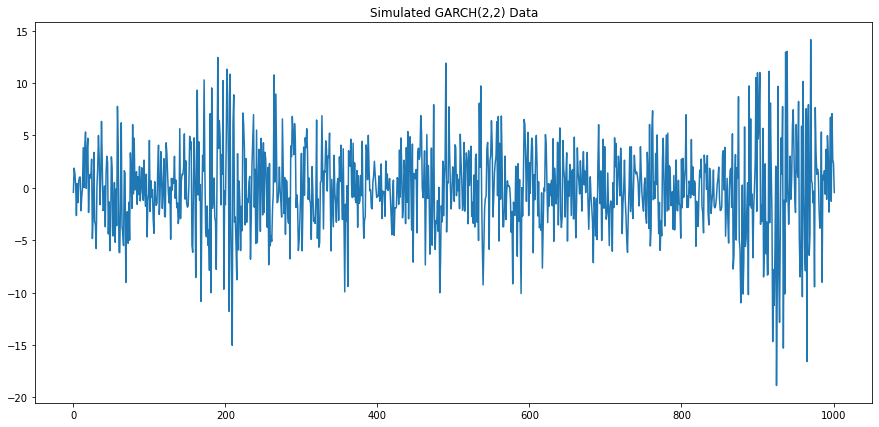

In [4]:
plt.figure(figsize=(15,7))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data')

Text(0.5, 1.0, 'Data Volatility')

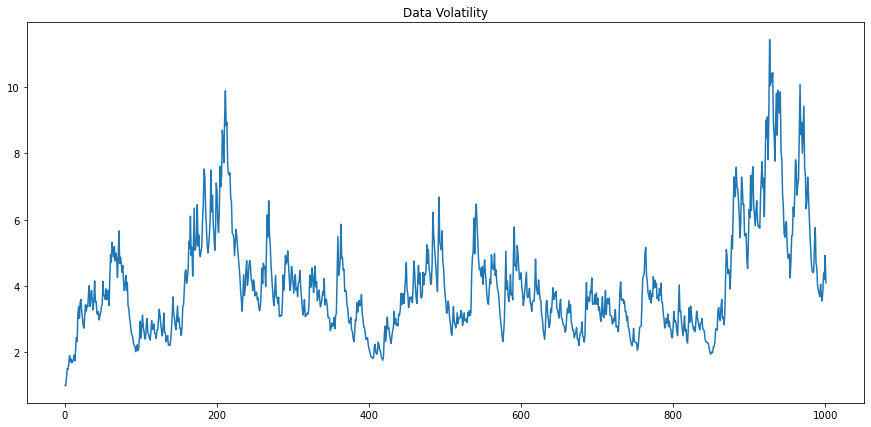

In [5]:
plt.figure(figsize=(15,7))
plt.plot(vols)
plt.title('Data Volatility')

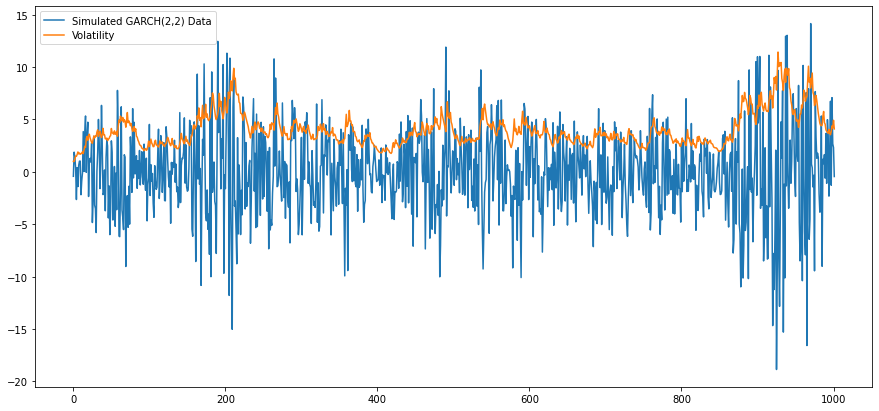

In [6]:
plt.figure(figsize=(15,7))
plt.plot(series, label='Simulated GARCH(2,2) Data')
plt.plot(vols, label='Volatility')
plt.legend(loc='best')
plt.show()

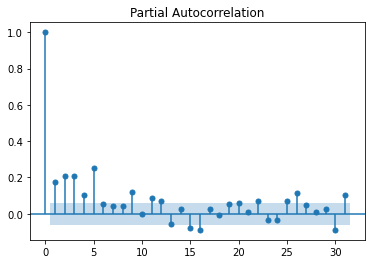

In [7]:
plot_pacf(np.array(series)**2)
plt.show()

In [8]:
train, test = series[:-test_size], series[-test_size:]

In [9]:
model = arch_model(train, p=2, q=2)

In [10]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 2649.1907101540087
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4125.869053411958
Iteration:      3,   Func. Count:     27,   Neg. LLF: 3268.4350455381878
Iteration:      4,   Func. Count:     36,   Neg. LLF: 2752.8170424352784
Iteration:      5,   Func. Count:     45,   Neg. LLF: 2559.588674152575
Iteration:      6,   Func. Count:     53,   Neg. LLF: 2409.7425778369775
Iteration:      7,   Func. Count:     61,   Neg. LLF: 2409.094071533449
Iteration:      8,   Func. Count:     68,   Neg. LLF: 2412.37919885018
Iteration:      9,   Func. Count:     76,   Neg. LLF: 2454.899969882453
Iteration:     10,   Func. Count:     85,   Neg. LLF: 2408.7896239174447
Iteration:     11,   Func. Count:     92,   Neg. LLF: 2408.7861278918745
Iteration:     12,   Func. Count:     99,   Neg. LLF: 2408.7858107140382
Iteration:     13,   Func. Count:    106,   Neg. LLF: 2408.7858007189143
Iteration:     14,   Func. Count:    112,   Neg. LLF: 240

In [11]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -2408.79
Distribution:                  Normal   AIC:                           4829.57
Method:            Maximum Likelihood   BIC:                           4858.40
                                        No. Observations:                  902
Date:                Fri, Jan 29 2021   Df Residuals:                      896
Time:                        16:53:42   Df Model:                            6
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0451      0.109     -0.413      0.680 [ -0.259,  0.169]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.4711      0.824      0.572      0.568 [ -1.144,  2.086]
alpha[1]   7.8985e-03  7.752e-02      0.102      0.919 [ -0.144,  0.160]
alpha[2]       0.1143      0.171      0.669      0.504 [ -0.221,  0.449]
beta[1]        0.8479      2.406      0.352      0.724 [ -3.867,  5.563]
beta[2]        0.0000      2.121      0.000      1.000 [ -4.157,  4.157]
========================================================================

Covariance estimator: robust
"""

In [12]:
predictions = model_fit.forecast(horizon=test_size)

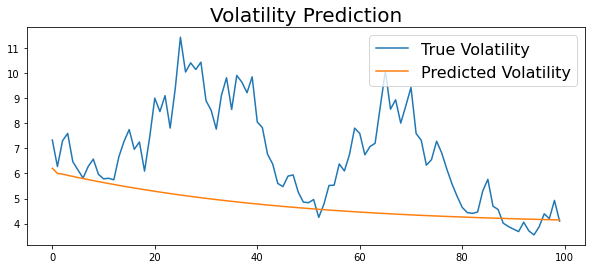

In [13]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

In [14]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

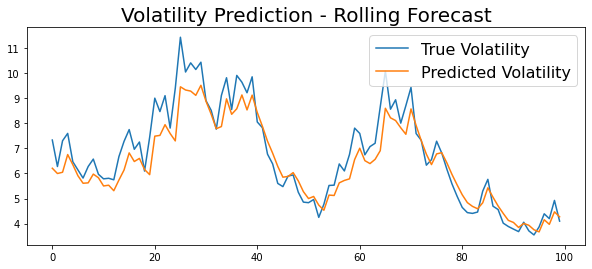

In [15]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)